<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades_Aprendizaje_-GPO117/blob/main/Actividad_Semanal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal - 4

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Ciencia y analítica de datos

Profesor Jobish Vallikavungal Devassia

Equipo 117

José Daniel Camacho Torres - A01793555

Jaik Randy Yocks Sandoval - A01793725

11/10/2022

# **Parte 1: Ejercicio guiado**

#Descripción del Proyecto: PCA y Análisis de Componentes Principales

De acuerdo con Marin (2008), cuando se analiza la información de una muestra de datos, lo más frecuente es tomar el mayor número posible de variables. Sin embargo, si tomamos demasiadas variables de la muestra que estamos evaluando, los posibles coeficientes de correlación aumentan significativamente y en este caso es difícil visualizar relaciones entre las variables.

Otro problema que se presenta es la fuerte correlación que muchas veces existe entre las variables: si tomamos demasiadas variables, lo normal es que estén relacionadas entre sí o que midan lo mismo bajo distintos puntos de vista.
Es aquí cuando se vuelve importante reducir el número de variables y por ende, solamente analizar los componentes principales que describan la mayor cantidad de información posible. El concepto de mayor información se relaciona con el de mayor variabilidad o varianza, cuanto mayor sea la varianza se considera que existe mayor información.

En este proyecto, vamos a tomar una base de datos que ya está limpia (sin valores nulos o valores que no hagan sentido en la clasificación) sobre una base de datos de personas en Taiwan, donde una entidad está buscando predecir, con base en información ya existente, si un cliente en el futuro es confiable para pagar sus deudas / créditos. Dado que la base de datos tiene 23 valores de entrada, se utilizará el modelo PCA para analizar al menos el 90% de la información con la menor cantidad de componentes posibles para llegar a dicho objetivo.

Para estudiar las relaciones, lo que hace PCA es transformar el conjunto original de variables en otro conjunto de nuevas variables indepencientes entre sí llamado conjunto de componentes principales. Las nuevas variables son combinaciones lineales de las anteriores y se van construyendo según el orden de importancia en cuanto a la variabilidad total que recogen de la muestra.
Finalmente estaremos analizando dentro de las nuevas variables, que al final resultaron ser 8 para cubrir cerca del 90% de la información, cuáles son las variables originales que más peso o contribución tienen para construirlas. 

Bibliografía:

Marin, J. (2008). Análisis de Componentes Principales. Universidad Carlos III De Madrid. Retrieved 

**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.**

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [ ]:
# Importación de las librerias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [ ]:
# Importamos los datos como un objeto de pandas
dataframe = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col = 0)

# se le da nombre a las columnas
headers = ["AmountCredit","Gender","Education","MaritalStatus","Age","HistPaySep2005","HistPayAug2005",
         "HistPayJul2005","HistPayJun2005","HistPayMay2005", "HistPayApr2005", "BillStatementSep2005", "BillStatementAug2005",
         "BillStatementJul2005", "BillStatementJun2005", "BillStatementMay2005", "BillStatementApr2005", "PreviousPaySep2005", "PreviousPayAug2005",
         "PreviousPayJul2005", "PreviousPayJun2005", "PreviousPayMay2005", "PreviousPayApr2005", "CreditAutorized"]
dataframe.columns = headers
dataframe.head(10)

,AmountCredit,Gender,Education,MaritalStatus,Age,HistPaySep2005,HistPayAug2005,HistPayJul2005,HistPayJun2005,HistPayMay2005,...,BillStatementJun2005,BillStatementMay2005,BillStatementApr2005,PreviousPaySep2005,PreviousPayAug2005,PreviousPayJul2005,PreviousPayJun2005,PreviousPayMay2005,PreviousPayApr2005,CreditAutorized
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0


In [ ]:
# Se crea un nuevo dataframe con las columnas numéricas
df = dataframe.drop(["Gender","Education","MaritalStatus","HistPaySep2005","HistPayAug2005","HistPayJul2005","HistPayJun2005","HistPayMay2005","HistPayApr2005","CreditAutorized"], axis=1)
df

,AmountCredit,Age,BillStatementSep2005,BillStatementAug2005,BillStatementJul2005,BillStatementJun2005,BillStatementMay2005,BillStatementApr2005,PreviousPaySep2005,PreviousPayAug2005,PreviousPayJul2005,PreviousPayJun2005,PreviousPayMay2005,PreviousPayApr2005
ID,,,,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [ ]:
# Se aplica PCA a los 14 componentes
pcs = PCA(14)

# Se realiza una normalización con la eliminan las filas con valores NaN
pcs.fit(preprocessing.scale(df.iloc[:, 0:14].dropna(axis=0)))

# Se calcula desviación estandar, la proporción de varianza y la proporción de varianza acumulativa
pcsSummary = pd.DataFrame(  {'Standard deviation': np.sqrt(pcs.explained_variance_),
                            'Proportion of variance': pcs.explained_variance_ratio_,
                            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})

# Se muestra el resultado
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.432904,0.422773,0.422773
1,1.309933,0.122562,0.545335
2,1.022276,0.074644,0.619979
3,0.961860,0.066082,0.686061
4,0.940077,0.063123,0.749183
5,0.934233,0.062340,0.811523
6,0.882978,0.055687,0.867211
7,0.852435,0.051902,0.919112
8,0.841052,0.050525,0.969637
9,0.514248,0.018889,0.988526


In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8411,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [ ]:
# Se agrega nombre a las columnas
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.432904,1.309933,1.022276,0.961860,0.940077,0.934233,0.882978,0.852435,0.841052,0.514248,0.266465,0.202635,0.159175,0.152457
Proportion of variance,0.422773,0.122562,0.074644,0.066082,0.063123,0.062340,0.055687,0.051902,0.050525,0.018889,0.005071,0.002933,0.001810,0.001660
Cumulative proportion,0.422773,0.545335,0.619979,0.686061,0.749183,0.811523,0.867211,0.919112,0.969637,0.988526,0.993597,0.996530,0.998340,1.000000




---



**Paso 2: Interprete cada componente principal en términos de las variables originales**

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente

In [ ]:
# Ahora se crea un dataframe con los 8 componentes principales
dfpc = pd.DataFrame(  pcs.components_.transpose(), 
                                columns=pcsSummary.columns,
                                index=df.iloc[:, 0:14].columns)

# Se muestra el dataframe en valor absoluto
valab = pd.DataFrame(data=dfpc.abs())
dfpc.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
AmountCredit,0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832,0.111146,-0.045317
Age,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416,-0.078753,0.027019
BillStatementSep2005,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998,0.008159,0.009324
BillStatementAug2005,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834,-0.032455,-0.135649
BillStatementJul2005,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222,-0.121170,0.093106
BillStatementJun2005,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530,0.126488,0.039127
BillStatementMay2005,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292,-0.007572,0.049746
BillStatementApr2005,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259,0.007893,-0.000365
PreviousPaySep2005,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580,-0.201663,-0.748696
PreviousPayAug2005,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358,-0.278849,0.578661


In [ ]:
####################################
# Mostramos los resultados obtenidos

# Se muestra cada componente en terminos de variables originales
print("Mayor contribuidor de PC1 = ",valab.PC1.nlargest(1))
print("Menor contribuidor de PC1 =",valab.PC1.idxmin(),"\n")

print("Mayor contribuidor de PC2 =",valab.PC2.nlargest(1))
print("Menor contribuidor de PC2 =",valab.PC2.idxmin(),"\n")

print("Mayor contribuidor de PC3 =",valab.PC3.nlargest(1))
print("Menor contribuidor de PC3 =",valab.PC3.idxmin(),"\n")

print("Mayor contribuidor de PC4 =",valab.PC4.nlargest(1))
print("Menor contribuidor de PC4 =",valab.PC4.idxmin(),"\n")

print("Mayor contribuidor de PC5 =",valab.PC5.nlargest(1))
print("Menor contribuidor de PC5 =",valab.PC5.idxmin(),"\n")

print("Mayor contribuidor de PC6 =",valab.PC6.nlargest(1))
print("Menor contribuidor de PC6 =",valab.PC6.idxmin(),"\n")

print("Mayor contribuidor de PC7 =",valab.PC7.nlargest(1))
print("Menor contribuidor de PC7 =",valab.PC7.idxmin(),"\n")

print("Mayor contribuidor de PC8 =",valab.PC8.nlargest(1))
print("Menor contribuidor de PC8 =",valab.PC8.idxmin(),"\n")

Mayor contribuidor de PC1 =  BillStatementJun2005    0.391561
Name: PC1, dtype: float64
Menor contribuidor de PC1 = Age 

Mayor contribuidor de PC2 = PreviousPayAug2005    0.40837
Name: PC2, dtype: float64
Menor contribuidor de PC2 = Age 

Mayor contribuidor de PC3 = Age    0.869404
Name: PC3, dtype: float64
Menor contribuidor de PC3 = BillStatementAug2005 

Mayor contribuidor de PC4 = PreviousPayMay2005    0.609847
Name: PC4, dtype: float64
Menor contribuidor de PC4 = BillStatementAug2005 

Mayor contribuidor de PC5 = PreviousPayApr2005    0.659221
Name: PC5, dtype: float64
Menor contribuidor de PC5 = BillStatementJun2005 

Mayor contribuidor de PC6 = PreviousPayMay2005    0.602374
Name: PC6, dtype: float64
Menor contribuidor de PC6 = BillStatementJun2005 

Mayor contribuidor de PC7 = PreviousPayJul2005    0.785238
Name: PC7, dtype: float64
Menor contribuidor de PC7 = BillStatementMay2005 

Mayor contribuidor de PC8 = PreviousPaySep2005    0.748696
Name: PC8, dtype: float64
Menor cont



---



**Paso 3: Identifique valores atípicos**

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico

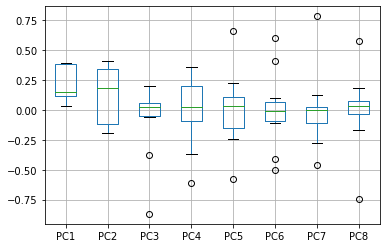

In [ ]:
# Por último hacemos boxplot y así encontrar valores atípicos de cada CP

boxplot=dfpc.iloc[:,:8]

boxplot.boxplot()

# **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

**1.- ¿Cuál es el número de componentes mínimo y por qué?**

El número de componentes principales a utilizar sería de 8 valores. Debido a que con esta cantidad estaríamos abarcando el 92% de la varianza de los datos. Sin embargo, si se requiriera utilizar menos variables, lo mínimo de componentes que se recomendaría sería de 7, correspondientes al 87% de la varianza acumulada.

**2.- ¿Cuál es la variación de los datos que representan esos componentes?**

Si eliminamos del componente 9 en adelante, se mantiene una proporción de varianza acumulada del 0.919, por lo tanto se puede decir que es de 92%. Lo cual representa una tasa bastante alta de información que estaríamos usando. Así que tendríamos casi por completo el porcentaje de varianza significativo por usar en el modelo

**3.- ¿Cuál es la pérdida de información después de realizar PCA?**

Perderíamos el 8.1% de los valores en caso de utilizar 8 componentes y el 13.3% en dado caso de utilizar 7 componentes.


**4.- De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Según el PCA las variables se dividirían en directa e indirecta.

Directa:

age 0.6492

amt_sep 0.2302

amount_credit 0.1422

amt_jun 0.0294

Indirecta:

amt_aug -0.7087

amt_jul -0.0432

amt_apl -0.0073

total_amt -0.0029

La variable total_amt, tiene una relación entre el 0.93 y 0.96 de correlación directa con las variables amt. Por lo que en dado caso de eliminar variables, sería útil reemplazar las variables amt por total_amt.

De igual manera, la variable total_paid, age y amount_credit; serían variables importantes a utilizar .


**5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

El Análisis de Componentes Principales o PCA es una herramienta utilizada para reducir la cantidad de variables de un conjunto de datos (reducción de la dimensionalidad), conservando la mayor cantidad de información posible.

El análisis de componentes principales es una técnica para la extracción de características, por lo que combina nuestras variables de entrada de una manera específica, luego podemos descartar las variables "menos importantes" y al mismo tiempo conservar las partes más valiosas de todas las variables. Como beneficio adicional, cada una de las variables "nuevas" después de PCA son independientes entre sí. Debido a que estas nuevas variables independientes son combinaciones de las antiguas, aún mantenemos las partes más valiosas de nuestras antiguas variables, ¡incluso cuando eliminamos una o más de estas "nuevas" variables!. Matt Brems. (2017).

Generalmente se recomienda usar PCA cuando:

- Existe multicolinealidad entre las variables, es decir cuando las variables explicativas del modelo están altamente correlacionadas entre sí.
- Las dimensiones de las características de entrada son altas (por ejemplo, muchas variables).
- También se puede utilizar para la eliminación del ruido y la compresión de los datos y la predicción de la salida de Y.
- Cuando se desea reducir la cantidad de variables, pero no se puede identificar cuales variables eliminar por completo.

Algunos de los beneficios que ofrece el uso del Análisis de Componentes Principales (PCA) en el Machine Learning son:

- Al reducir la dimensionalidad de los datos, PCA nos permite generalizar mejor los modelos de aprendizaje automático. Esto nos ayuda a lidiar con la "maldición de la dimensionalidad", es un problema que se puede llegar a presentar si queremos tener en cuenta todas las características (o atributos) posibles en un sistema, sin embargo esto es un error que desembocará en un tiempo de procesamiento alto y en una selección de datos de entrada irrelevantes o redundantes por ejemplo en un sistema de clasificación.
- PCA puede ayudarnos a mejorar el rendimiento a un costo muy bajo de precisión del modelo de aprendizaje de maquina, dado que el rendimiento del algoritmo depende de la dimensión de los datos, y si el modelo se ejecuta en datos de dimensiones muy altas, puede funcionar muy lentamente, o incluso fallar, y requerir de recursos de servidores significativos.
- PCA también nos permite visualizar datos y permitir la inspección de algoritmos de agrupamiento/clasificación.
- Finalmente, otros beneficios de PCA incluyen la reducción del ruido en los datos, la selección de características (hasta cierto punto) y la capacidad de producir características independientes y no correlacionadas de los datos.

Referencias:

Matt Brems. (2017). A One-Stop Shop for Principal Component Analysis. Recuperado de https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

Serafim Loukas. (2020). PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python. Recuperado de https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e#:~:text=When%2FWhy%20to%20use%20PCA,for%20denoising%20and%20data%20compression.

Jose, M. (2020). La Maldición de la Dimensión en Machine Learning. Recuperado de https://www.iartificial.net/la-maldicion-de-la-dimension-en-machine-learning/

Iftach Arbel. (2022). ¿What is Principal Component Analysis?. Rcuperado de https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/#:~:text=PCA%20can%20help%20us%20improve,uncorrelated%20features%20of%20the%20data.

